In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np

In [2]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),        # 28x28 -> 784
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')       # 10 classes
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # integer labels (0–9)
    metrics=['accuracy']
)


In [6]:
val_size = 5000
x_val, y_val = x_train[-val_size:], y_train[-val_size:]
x_train, y_train = x_train[:-val_size], y_train[:-val_size]

In [7]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2
)

Epoch 1/15
430/430 - 9s - 21ms/step - accuracy: 0.7917 - loss: 0.5847 - val_accuracy: 0.8506 - val_loss: 0.4135
Epoch 2/15
430/430 - 6s - 15ms/step - accuracy: 0.8512 - loss: 0.4126 - val_accuracy: 0.8632 - val_loss: 0.3645
Epoch 3/15
430/430 - 8s - 18ms/step - accuracy: 0.8666 - loss: 0.3687 - val_accuracy: 0.8658 - val_loss: 0.3652
Epoch 4/15
430/430 - 7s - 17ms/step - accuracy: 0.8729 - loss: 0.3456 - val_accuracy: 0.8744 - val_loss: 0.3384
Epoch 5/15
430/430 - 10s - 24ms/step - accuracy: 0.8790 - loss: 0.3293 - val_accuracy: 0.8812 - val_loss: 0.3251
Epoch 6/15
430/430 - 8s - 19ms/step - accuracy: 0.8825 - loss: 0.3168 - val_accuracy: 0.8842 - val_loss: 0.3120
Epoch 7/15
430/430 - 7s - 17ms/step - accuracy: 0.8889 - loss: 0.3030 - val_accuracy: 0.8842 - val_loss: 0.3180
Epoch 8/15
430/430 - 10s - 23ms/step - accuracy: 0.8897 - loss: 0.2953 - val_accuracy: 0.8814 - val_loss: 0.3156
Epoch 9/15
430/430 - 8s - 20ms/step - accuracy: 0.8923 - loss: 0.2879 - val_accuracy: 0.8870 - val_los

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%  |  Test Loss: {test_loss:.4f}")


Test Accuracy: 88.92%  |  Test Loss: 0.3122


In [9]:
idx = 0
sample = x_test[idx].reshape(1, 28, 28)
probs = model.predict(sample, verbose=0)[0]
pred_class = np.argmax(probs)
print(f"\nSample #{idx} -> Predicted: {class_names[pred_class]} (class {pred_class})")


Sample #0 -> Predicted: Ankle boot (class 9)


In [10]:
import matplotlib.pyplot as plt

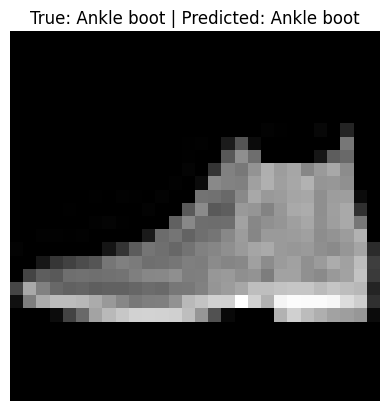

In [11]:
plt.imshow(x_test[idx], cmap="gray")
plt.title(f"True: {class_names[y_test[idx]]} | Predicted: {class_names[pred_class]}")
plt.axis("off")
plt.show()